### Disclaimer
- Refer README.md for the analysis outcomes.
- Refer #comments on each cell.

Importing the dataset that contains the Total Oustanding Liabilities

In [1]:
import pandas as pd
outstanding_lia=pd.read_csv("Datasets/Outstanding Liabilites of Indian States by Arun.csv")
outstannding_lia = pd.DataFrame(outstanding_lia)
outstanding_lia.head()
#initial issue of comma removal was done through google sheets formating by applying cusotm formatting->0
#debt is in crores

,STATES,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Andhra Pradesh,122605.8,147935.2,254283.0,229333.8,264451.0,307671.5,353021.0,380548.5,428715.7,485490.8
1,Arunachal Pradesh,6164.8,5717.1,5669.6,6968.7,8430.5,12125.1,14077.4,15924.6,18850.4,21654.2
2,Assam,35459.1,41963.7,44036.5,49309.8,59796.4,73527.8,89709.1,102366.3,126281.4,150900.4
3,Bihar,99398.6,116774.8,139069.3,156980.5,169045.4,193534.3,227425.9,257634.7,293850.5,319618.3
4,Chhattisgarh,31088.4,39264.9,43397.0,55049.5,68981.5,86005.7,100016.1,106451.1,109664.1,122164.1


In [2]:
#adding this because the growth values come into the main dataset and ruin the plots
testdf=outstanding_lia.copy()

Calculating the growth rate using year-over-year method

In [3]:
import pandas as pd

tol_columns = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']


# Calculate yearly growth rate for each year
for i in range(1, len(tol_columns)):
    prev_column = tol_columns[i - 1]
    current_column = tol_columns[i]

    # Ensure columns exist before calculation
    if prev_column in testdf.columns and current_column in testdf.columns:
        testdf[f'Growth Rate {tol_columns[i]}'] = ((testdf[current_column] - testdf[prev_column])
                                                    / testdf[prev_column]) * 100
    else:
        print(f"Columns {prev_column} or {current_column} are missing in testdf")

# Calculate average growth rate
growth_rate_columns = [f'Growth Rate {year}' for year in range(2016, 2025) if f'Growth Rate {year}' in testdf.columns]
testdf['Average Growth Rate'] = testdf[growth_rate_columns].mean(axis=1)

# Display growth rates
display_columns = ['STATES'] + growth_rate_columns + ['Average Growth Rate']
print(testdf[display_columns])


               STATES  Growth Rate 2016  Growth Rate 2017  Growth Rate 2018  \
0      Andhra Pradesh         20.659218         71.888097         -9.811588   
1   Arunachal Pradesh         -7.262198         -0.830841         22.913433   
2               Assam         18.343951          4.939507         11.974839   
3               Bihar         17.481333         19.091876         12.879334   
4        Chhattisgarh         26.300807         10.523648         26.850934   
5                 Goa         11.102514          8.000818         10.286870   
6             Gujarat         14.317501          5.119492         10.234293   
7             Haryana         33.654446         20.635732         11.946674   
8    Himachal Pradesh          7.896046         14.678389          8.013648   
9           Jharkhand         30.421791         18.055850         15.198115   
10          Karnataka         17.255898         13.716166         16.470923   
11             Kerala         13.036443         18.0

Calculating the average growth rate of whole country during different years

In [4]:
# we will be calculating the average growth rate for entire country
import pandas as pd

# Assuming 'test df' is your DataFrame
# Get a list of column names for all the years
year_columns = [col for col in testdf.columns if "Growth Rate" in col]

# Create a dictionary to store average growth rates for each year
average_growth_per_year = {}

for year_col in year_columns:
    # Calculate the mean growth rate for the year across all states
    average_growth_per_year[year_col] = testdf[year_col].mean()

# Convert to a DataFrame for easier readability (optional)
average_growth_df = pd.DataFrame(list(average_growth_per_year.items()), columns=['Year', 'Average_Growth_Rate'])

# Display the result
print("Average Growth Rate for Each Year:")
print(average_growth_df)


Average Growth Rate for Each Year:
                  Year  Average_Growth_Rate
0     Growth Rate 2016            16.665910
1     Growth Rate 2017            17.203750
2     Growth Rate 2018            10.459096
3     Growth Rate 2019            12.118013
4     Growth Rate 2020            14.838720
5     Growth Rate 2021            18.942500
6     Growth Rate 2022            12.985536
7     Growth Rate 2023             8.779363
8     Growth Rate 2024            11.349855
9  Average Growth Rate            13.704749


PLotting average growth rate for each state

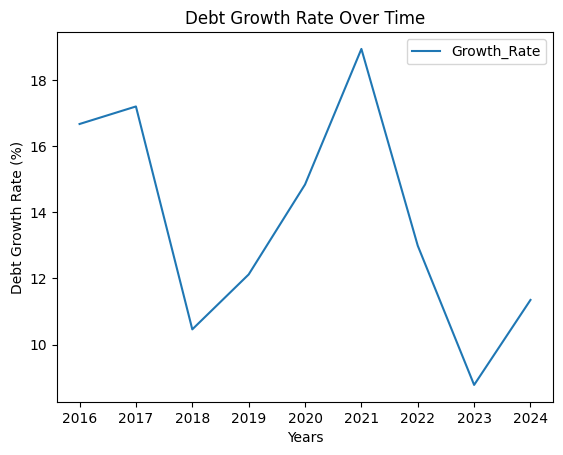

Text(0, 0.5, 'Growth Rate')

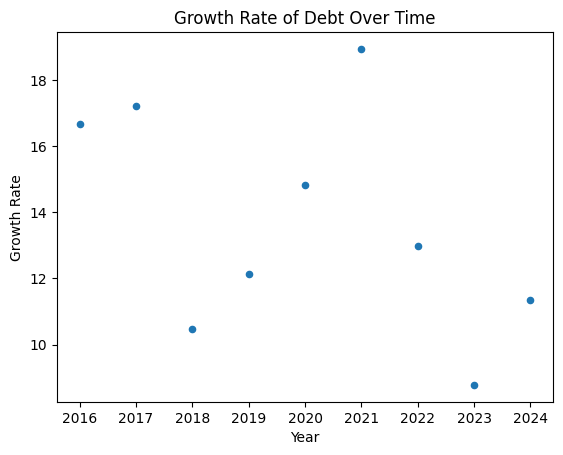

In [5]:
#plotting average growth rates for each year
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Createing a dataframe
#removed the TOL- to save space
debt_growth_rate = {
    "Year": ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'],
    "Growth_Rate": [16.67, 17.20, 10.46, 12.12, 14.84, 18.94, 12.99, 8.78, 11.35]
}

df = pd.DataFrame(debt_growth_rate)
#print(df)

# plotting
df.plot(x="Year", y="Growth_Rate", kind="line")
plt.xlabel("Years")
plt.ylabel("Debt Growth Rate (%)")
plt.title("Debt Growth Rate Over Time")
plt.show()

#scatter plotting the same data


df.plot(x="Year", y="Growth_Rate", kind="scatter")
plt.title("Growth Rate of Debt Over Time")
plt.xlabel("Year")
plt.ylabel("Growth Rate")


#2021 had highest average growth rate and 2023 had the lowest

From the chart it is evident that 2021 had the highest growth rate and 2023 had the lowest

PLotting which state has highest debt during what year

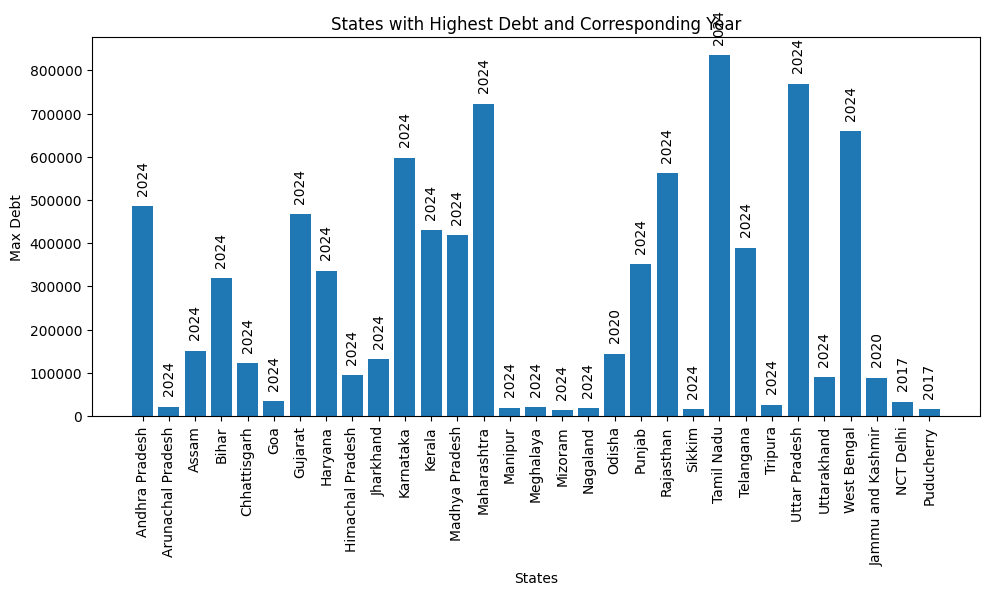

In [6]:
#plotting which state has the highest debt and at which year
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#states names
states=outstanding_lia["STATES"]

#max value from every state
debt=outstanding_lia.iloc[:,1:]

#taking max year
debt_years=debt.idxmax(axis=1)
#taking max value
debt_max=debt.max(axis=1)

finaldf=pd.DataFrame({
    "State":states,
    "Max Debt Year":debt_years,
    "Max Debt":debt_max
})
#print(finaldf)


plt.figure(figsize=(10, 6))
plt.bar(finaldf['State'], finaldf['Max Debt'])
plt.title("States with Highest Debt and Corresponding Year")
plt.xlabel("States")
plt.ylabel("Max Debt")
plt.xticks(rotation=90)  # Rotates the state names for better readability
plt.tight_layout()  # Adjust the layout to make space for labels

# Annotate each bar with the year of max debt used AI
for i in range(len(finaldf)):
    plt.annotate(
        finaldf['Max Debt Year'].iloc[i],  # Year to display
        (finaldf['State'].iloc[i], finaldf['Max Debt'].iloc[i]),  # Position of annotation
        textcoords="offset points",  # Offset to make the text clearer
        xytext=(0, 10),  # Offset from the top of the bar
        rotation=90,
        ha='center'  # Center-aligns the annotation
    )

plt.show()


#most states peak in 2024 which shows us that debt hasnt been decreasing


At a certain year what state lead the debt 

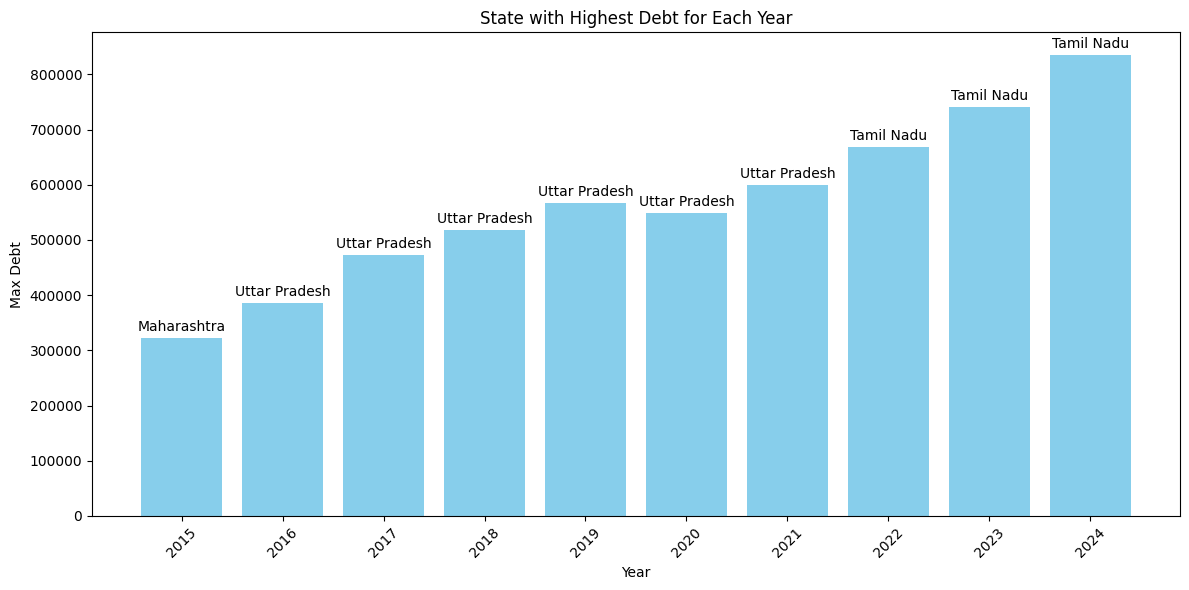

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Finding the state with the highest debt for each year
max_states_per_year = outstanding_lia.set_index("STATES").idxmax()
max_debt_per_year = outstanding_lia.set_index("STATES").max()

# Creating a DataFrame with the results
yearly_max_df = pd.DataFrame({
    "Year": max_states_per_year.index,
    "State with Max Debt": max_states_per_year.values,
    "Max Debt": max_debt_per_year.values
})

#plotting
plt.figure(figsize=(12, 6))
plt.bar(yearly_max_df["Year"], yearly_max_df["Max Debt"], color='skyblue')
plt.title("State with Highest Debt for Each Year")
plt.xlabel("Year")
plt.ylabel("Max Debt")

#used ai for annotations
for i, (year, state, debt) in enumerate(zip(yearly_max_df["Year"], yearly_max_df["State with Max Debt"], yearly_max_df["Max Debt"])):
    plt.annotate(
        f"{state}",  # State with highest debt for the year
        (year, debt),
        textcoords="offset points",
        xytext=(0, 5),  # Offset above the bar
        ha='center'
    )

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#UP and TN leads the most reccent high debt states


uploading the population dataset as per the 2011 census

In [ ]:
#importing population prijection dataset
import pandas as pd
population=pd.read_csv("Datasets/Population Projection By Arun.csv")
population=pd.DataFrame(population)
print(population)
#telangana population is taken as of 2011 one from seperate site
#population is in crores

              STATES   Population
0      Andhra Pradesh    84580777
1   Arunachal Pradesh     1383727
2               Assam    31205576
3               Bihar   104099452
4        Chhattisgarh    25545198
5                 Goa     1458545
6             Gujarat    60439692
7             Haryana    25351462
8    Himachal Pradesh     6864602
9           Jharkhand    32988134
10          Karnataka    61095297
11             Kerala    33406061
12     Madhya Pradesh    72626809
13        Maharashtra   112374333
14            Manipur     2721756
15          Meghalaya     2966889
16            Mizoram     1097206
17           Nagaland     1978502
18             Odisha    41974218
19             Punjab    27743338
20          Rajasthan    68548437
21             Sikkim      610577
22         Tamil Nadu    72147030
23          Telangana    35004000
24            Tripura     3673917
25      Uttar Pradesh   199812341
26        Uttarakhand    10086292
27        West Bengal    91276115
28  Jammu and 

In [9]:
population.rename(columns={"Population":2011},inplace=True)

Projecting the population as the the census projected growth rate (1%)

In [10]:
for year in range(2012, 2025):
  population[year] = population[year - 1] * 1.01
population

,STATES,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Andhra Pradesh,84580777,8.542658e+07,8.628085e+07,8.714366e+07,8.801510e+07,8.889525e+07,8.978420e+07,9.068204e+07,9.158886e+07,9.250475e+07,9.342980e+07,9.436410e+07,9.530774e+07,9.626081e+07
1,Arunachal Pradesh,1383727,1.397564e+06,1.411540e+06,1.425655e+06,1.439912e+06,1.454311e+06,1.468854e+06,1.483543e+06,1.498378e+06,1.513362e+06,1.528495e+06,1.543780e+06,1.559218e+06,1.574810e+06
2,Assam,31205576,3.151763e+07,3.183281e+07,3.215114e+07,3.247265e+07,3.279737e+07,3.312535e+07,3.345660e+07,3.379117e+07,3.412908e+07,3.447037e+07,3.481507e+07,3.516322e+07,3.551486e+07
3,Bihar,104099452,1.051404e+08,1.061919e+08,1.072538e+08,1.083263e+08,1.094096e+08,1.105037e+08,1.116087e+08,1.127248e+08,1.138520e+08,1.149906e+08,1.161405e+08,1.173019e+08,1.184749e+08
4,Chhattisgarh,25545198,2.580065e+07,2.605866e+07,2.631924e+07,2.658244e+07,2.684826e+07,2.711674e+07,2.738791e+07,2.766179e+07,2.793841e+07,2.821779e+07,2.849997e+07,2.878497e+07,2.907282e+07
5,Goa,1458545,1.473130e+06,1.487862e+06,1.502740e+06,1.517768e+06,1.532945e+06,1.548275e+06,1.563758e+06,1.579395e+06,1.595189e+06,1.611141e+06,1.627252e+06,1.643525e+06,1.659960e+06
6,Gujarat,60439692,6.104409e+07,6.165453e+07,6.227108e+07,6.289379e+07,6.352272e+07,6.415795e+07,6.479953e+07,6.544753e+07,6.610200e+07,6.676302e+07,6.743065e+07,6.810496e+07,6.878601e+07
7,Haryana,25351462,2.560498e+07,2.586103e+07,2.611964e+07,2.638083e+07,2.664464e+07,2.691109e+07,2.718020e+07,2.745200e+07,2.772652e+07,2.800379e+07,2.828382e+07,2.856666e+07,2.885233e+07
8,Himachal Pradesh,6864602,6.933248e+06,7.002581e+06,7.072606e+06,7.143332e+06,7.214766e+06,7.286913e+06,7.359782e+06,7.433380e+06,7.507714e+06,7.582791e+06,7.658619e+06,7.735205e+06,7.812557e+06
9,Jharkhand,32988134,3.331802e+07,3.365120e+07,3.398771e+07,3.432758e+07,3.467086e+07,3.501757e+07,3.536774e+07,3.572142e+07,3.607864e+07,3.643942e+07,3.680382e+07,3.717186e+07,3.754357e+07


Importing the TOL and Population combined dataset to find insights

In [11]:
import pandas as pd
work=pd.read_csv("Datasets/tol and projected population by arun.csv")
work=pd.DataFrame(work)
work.head() 
#both debt and population are in crores

,STATES,L-2015,L-2016,L-2017,L-2018,L-2019,L-2020,L-2021,L-2022,L-2023,...,P-2015,P-2016,P-2017,P-2018,P-2019,P-2020,P-2021,P-2022,P-2023,P-2024
0,Andhra Pradesh,122605.8,147935.2,254283.0,229333.8,264451.0,307671.5,353021.0,380548.5,428715.7,...,8.801510e+07,8.889525e+07,8.978420e+07,9.068204e+07,9.158886e+07,9.250475e+07,9.342980e+07,9.436410e+07,9.530774e+07,9.626081e+07
1,Arunachal Pradesh,6164.8,5717.1,5669.6,6968.7,8430.5,12125.1,14077.4,15924.6,18850.4,...,1.439912e+06,1.454311e+06,1.468854e+06,1.483543e+06,1.498378e+06,1.513362e+06,1.528495e+06,1.543780e+06,1.559218e+06,1.574810e+06
2,Assam,35459.1,41963.7,44036.5,49309.8,59796.4,73527.8,89709.1,102366.3,126281.4,...,3.247265e+07,3.279737e+07,3.312535e+07,3.345660e+07,3.379117e+07,3.412908e+07,3.447037e+07,3.481507e+07,3.516322e+07,3.551486e+07
3,Bihar,99398.6,116774.8,139069.3,156980.5,169045.4,193534.3,227425.9,257634.7,293850.5,...,1.083263e+08,1.094096e+08,1.105037e+08,1.116087e+08,1.127248e+08,1.138520e+08,1.149906e+08,1.161405e+08,1.173019e+08,1.184749e+08
4,Chhattisgarh,31088.4,39264.9,43397.0,55049.5,68981.5,86005.7,100016.1,106451.1,109664.1,...,2.658244e+07,2.684826e+07,2.711674e+07,2.738791e+07,2.766179e+07,2.793841e+07,2.821779e+07,2.849997e+07,2.878497e+07,2.907282e+07


Finding the debt per person, i.e hypothtically-> how much debt a person has

In [12]:
import pandas as pd

# Create a new dataframe for debt per person
debt_per_person = pd.DataFrame()

# Assuming `work` is your original dataframe
debt_per_person['STATES'] = work['STATES']  # Add the State column from the 'work' dataframe

# Calculate debt per person for each year and add to the new dataframe
for year in range(2015, 2025):
    debt_per_person[f'Debt_Per_Person_{year}'] = work[f'L-{year}'] / work[f'P-{year}']

# View the new dataframe with state and debt per person columns
debt_per_person.head()
#in crores

,STATES,Debt_Per_Person_2015,Debt_Per_Person_2016,Debt_Per_Person_2017,Debt_Per_Person_2018,Debt_Per_Person_2019,Debt_Per_Person_2020,Debt_Per_Person_2021,Debt_Per_Person_2022,Debt_Per_Person_2023,Debt_Per_Person_2024
0,Andhra Pradesh,0.001393,0.001664,0.002832,0.002529,0.002887,0.003326,0.003778,0.004033,0.004498,0.005043
1,Arunachal Pradesh,0.004281,0.003931,0.003860,0.004697,0.005626,0.008012,0.009210,0.010315,0.012090,0.013750
2,Assam,0.001092,0.001279,0.001329,0.001474,0.001770,0.002154,0.002602,0.002940,0.003591,0.004249
3,Bihar,0.000918,0.001067,0.001259,0.001407,0.001500,0.001700,0.001978,0.002218,0.002505,0.002698
4,Chhattisgarh,0.001170,0.001462,0.001600,0.002010,0.002494,0.003078,0.003544,0.003735,0.003810,0.004202


Converting into thousands for better understanding

In [13]:
import pandas as pd
# making copy for that dataset
debt_per_person_converted = debt_per_person

#multiplying to convert from crores
for year in range(2015, 2025):
    debt_per_person_converted[f'Debt_Per_Person_{year}'] *= 10_000_000

# Now we have `debt_per_person` in crores and `debt_per_person_converted` in rupees
debt_per_person_converted.head()  # Converted to rupees


,STATES,Debt_Per_Person_2015,Debt_Per_Person_2016,Debt_Per_Person_2017,Debt_Per_Person_2018,Debt_Per_Person_2019,Debt_Per_Person_2020,Debt_Per_Person_2021,Debt_Per_Person_2022,Debt_Per_Person_2023,Debt_Per_Person_2024
0,Andhra Pradesh,13930.087674,16641.519715,28321.575782,25289.880680,28873.707518,33260.075776,37784.626408,40327.679444,44982.255936,50434.936090
1,Arunachal Pradesh,42813.731520,39311.399439,38598.796348,46973.371983,56264.171369,80120.296888,92099.717457,103153.271382,120896.483779,137503.536846
2,Assam,10919.682474,12794.835343,13293.898179,14738.436726,17695.866973,21544.032939,26024.989232,29402.867799,35912.918443,42489.373594
3,Bihar,9175.850499,10673.179657,12585.039486,14065.256234,14996.293224,16998.755951,19777.789077,22183.026676,25050.794566,26977.725713
4,Chhattisgarh,11695.090927,14624.746724,16003.765980,20099.927414,24937.468840,30784.038794,35444.340884,37351.304022,38097.696706,42020.040576


In [14]:
#adding the debt per person converted into the main dataset
#using concat since append is taken out
toadd=debt_per_person_converted.iloc[:,1:11]
toadd.head()
work = pd.concat([work, toadd], axis=1)
work.head()

,STATES,L-2015,L-2016,L-2017,L-2018,L-2019,L-2020,L-2021,L-2022,L-2023,...,Debt_Per_Person_2015,Debt_Per_Person_2016,Debt_Per_Person_2017,Debt_Per_Person_2018,Debt_Per_Person_2019,Debt_Per_Person_2020,Debt_Per_Person_2021,Debt_Per_Person_2022,Debt_Per_Person_2023,Debt_Per_Person_2024
0,Andhra Pradesh,122605.8,147935.2,254283.0,229333.8,264451.0,307671.5,353021.0,380548.5,428715.7,...,13930.087674,16641.519715,28321.575782,25289.880680,28873.707518,33260.075776,37784.626408,40327.679444,44982.255936,50434.936090
1,Arunachal Pradesh,6164.8,5717.1,5669.6,6968.7,8430.5,12125.1,14077.4,15924.6,18850.4,...,42813.731520,39311.399439,38598.796348,46973.371983,56264.171369,80120.296888,92099.717457,103153.271382,120896.483779,137503.536846
2,Assam,35459.1,41963.7,44036.5,49309.8,59796.4,73527.8,89709.1,102366.3,126281.4,...,10919.682474,12794.835343,13293.898179,14738.436726,17695.866973,21544.032939,26024.989232,29402.867799,35912.918443,42489.373594
3,Bihar,99398.6,116774.8,139069.3,156980.5,169045.4,193534.3,227425.9,257634.7,293850.5,...,9175.850499,10673.179657,12585.039486,14065.256234,14996.293224,16998.755951,19777.789077,22183.026676,25050.794566,26977.725713
4,Chhattisgarh,31088.4,39264.9,43397.0,55049.5,68981.5,86005.7,100016.1,106451.1,109664.1,...,11695.090927,14624.746724,16003.765980,20099.927414,24937.468840,30784.038794,35444.340884,37351.304022,38097.696706,42020.040576


In [15]:
print(work.columns)

Index(['STATES', 'L-2015', 'L-2016', 'L-2017', 'L-2018', 'L-2019', 'L-2020',
       'L-2021', 'L-2022', 'L-2023', 'L-2024', 'P-2015', 'P-2016', 'P-2017',
       'P-2018', 'P-2019', 'P-2020', 'P-2021', 'P-2022', 'P-2023', 'P-2024',
       'Debt_Per_Person_2015', 'Debt_Per_Person_2016', 'Debt_Per_Person_2017',
       'Debt_Per_Person_2018', 'Debt_Per_Person_2019', 'Debt_Per_Person_2020',
       'Debt_Per_Person_2021', 'Debt_Per_Person_2022', 'Debt_Per_Person_2023',
       'Debt_Per_Person_2024'],
      dtype='object')


Creating a dataframe to isolate the debt_per person of 2024

In [16]:
import pandas as pd

# Create a new DataFrame with only the STATES and Debt_Per_Person_2024 columns
debt_person_2024 = debt_per_person_converted[['STATES', 'Debt_Per_Person_2024']]

debt_person_2024.head(6)

,STATES,Debt_Per_Person_2024
0,Andhra Pradesh,50434.936090
1,Arunachal Pradesh,137503.536846
2,Assam,42489.373594
3,Bihar,26977.725713
4,Chhattisgarh,42020.040576
5,Goa,209392.964120


Plotting debt per person in 2024

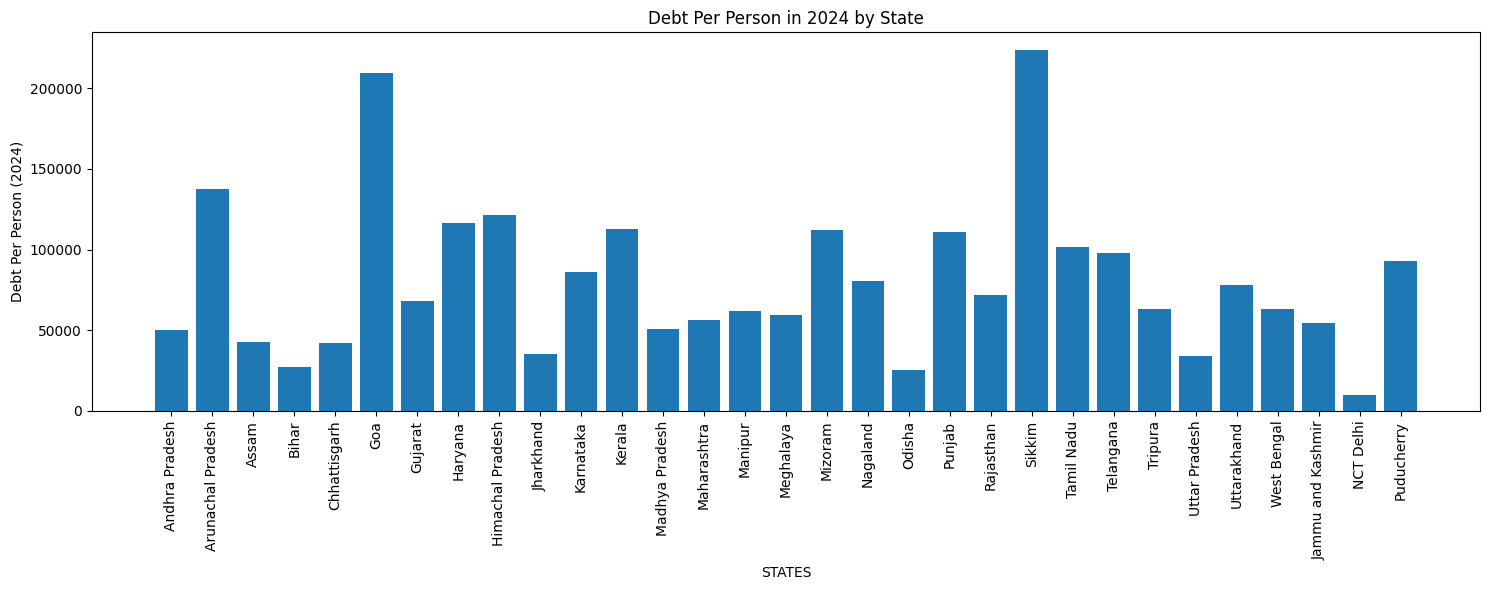

In [17]:

import matplotlib.pyplot as plt

#  bar plot with STATES on the x-axis and Debt_Per_Person_2024 on the y-axis
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
plt.bar(debt_person_2024['STATES'], debt_person_2024['Debt_Per_Person_2024'])
plt.xlabel('STATES')
plt.ylabel('Debt Per Person (2024)')
plt.title('Debt Per Person in 2024 by State')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability if needed
plt.tight_layout()
plt.show()

Larger States (e.g., Maharashtra, Uttar Pradesh, West Bengal): These have moderate debt per person amounts in the tens of thousands, which aligns with their large populations that spread out the debt.

Smaller, High-Debt States (e.g., Goa, Sikkim, Himachal Pradesh): States like Goa and Sikkim show higher debt per person amounts (above ₹1 lakh in many cases) because they have smaller populations but relatively high outstanding liabilities.

Special Cases (e.g., NCT Delhi): Delhi’s debt per person is noticeably low compared to other states, which could be due to a combination of lower per capita liabilities or higher population density, thus distributing debt more thinly.

Finding co-relation between the debt of 2024 and population of 2024

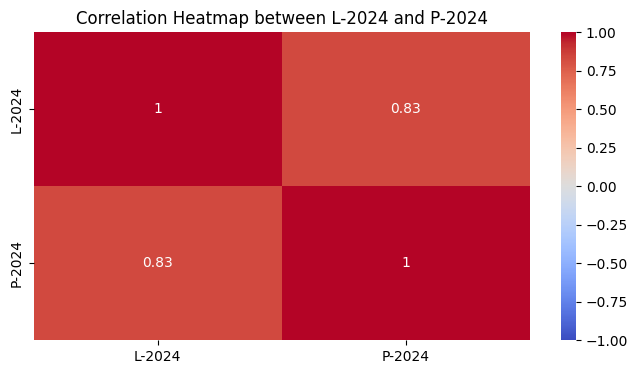

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `work` is your dataset with columns 'L-2024' and 'P-2024'
# Calculate the correlation matrix
correlation_matrix = work[['L-2024', 'P-2024']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap between L-2024 and P-2024")
plt.show()


This is the heatmap of 2024 debt and population and it shows that states with more population is having more debt

The above heatmap gave us the co relation between debt and population of 2024


For the next we will see how it is for the past 10 years to confirm our finding

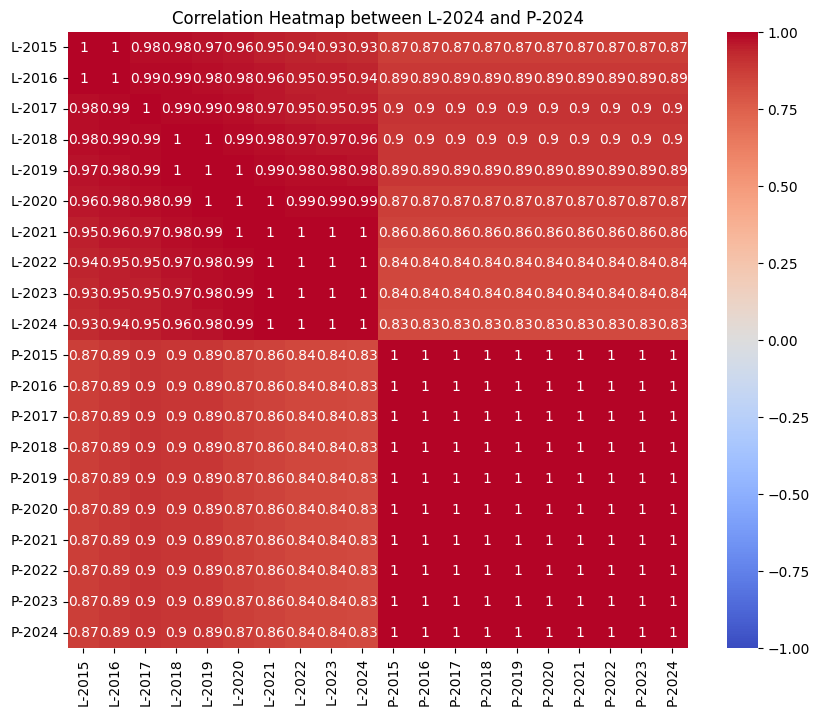

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `work` is your dataset with columns 'L-2024' and 'P-2024'
# Calculate the correlation matrix
correlation_matrix = work[["L-2015","L-2016","L-2017","L-2018","L-2019","L-2020","L-2021","L-2022",	"L-2023",	"L-2024",	"P-2015",	"P-2016",	"P-2017",	"P-2018",	"P-2019"	,"P-2020"	,"P-2021"	,"P-2022",	"P-2023",	"P-2024"]].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1) #vmin and vmax are scale for co relation
plt.title("Correlation Heatmap between L-2024 and P-2024")
plt.show()


The correlation between each year’s liabilities and each year’s population is consistently high (around 0.84–0.87). This suggests a strong positive relationship between state population and outstanding liabilities. In other words, states with larger populations tend to have higher outstanding liabilities, and this relationship remains stable over the years.

This heatmap highlights a strong positive relationship between population and liabilities across the years. The high correlations suggest that states with larger populations consistently have higher outstanding liabilities, possibly indicating a relationship where states' debt levels scale with population size.


numeric_columns = work.select_dtypes(include=['number']) #to filter numeric columns from a dataframe

(method='spearman') if we have doubt our distribution is linear or our distribution is monotonic

finding the correlation of the same but using spearmans 

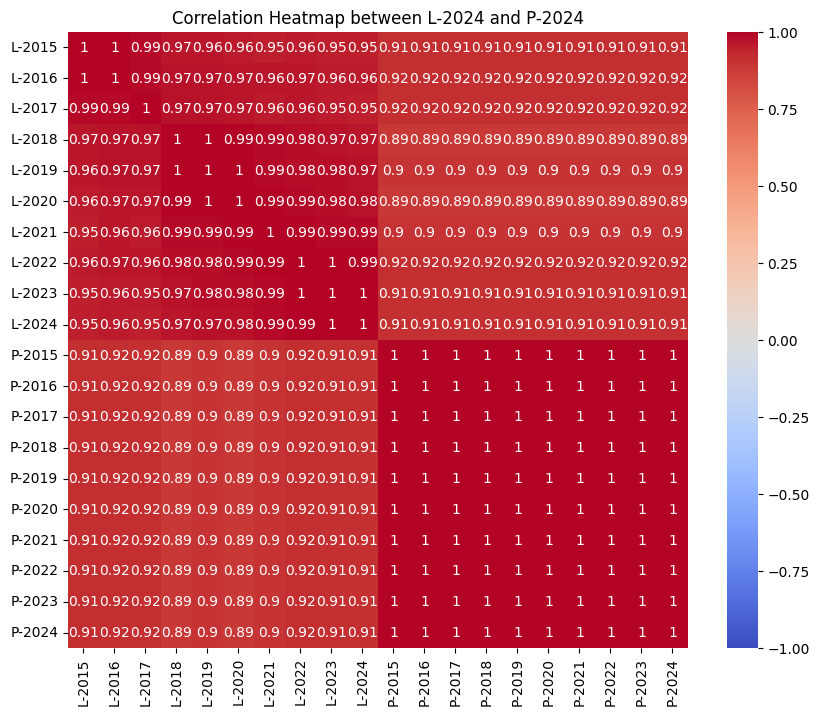

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `work` is your dataset with columns 'L-2024' and 'P-2024'
# Calculate the correlation matrix
correlation_matrix = work[["L-2015","L-2016","L-2017","L-2018","L-2019","L-2020","L-2021","L-2022",	"L-2023",	"L-2024",	"P-2015",	"P-2016",	"P-2017",	"P-2018",	"P-2019"	,"P-2020"	,"P-2021"	,"P-2022",	"P-2023",	"P-2024"]].corr(method="spearman")

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap between L-2024 and P-2024")
plt.show()


Even when using spearmans corelation coefficient we still get postiive corelation by which we can confirm that more the population more the debt is

Now we will be adding the area of states in km^2 unit to see how it co relates with the debt of the respective states

In [21]:
#adding area into our dataframe 
area=['162975', '83743', '78438', '94163', '135192', '3702', '196024', '44212', '55673', '79716','191791', '38863', '308252', '307713', '22327','22429','21081','16579','155707','50362','342239','7096','130058','122077','10491','240928','53483','88752','42241','1484','479' ] 
area=pd.DataFrame(area,columns=['Area(km^2)']) #giving our column name since we are making a list into our dataframe
area.head(6)
#adding this dataframe into work 
work = pd.concat([work, area], axis=1)
#work.head(6)
#commenting to not repeat again

Plotting to see the co-relation between are of a state and its debt

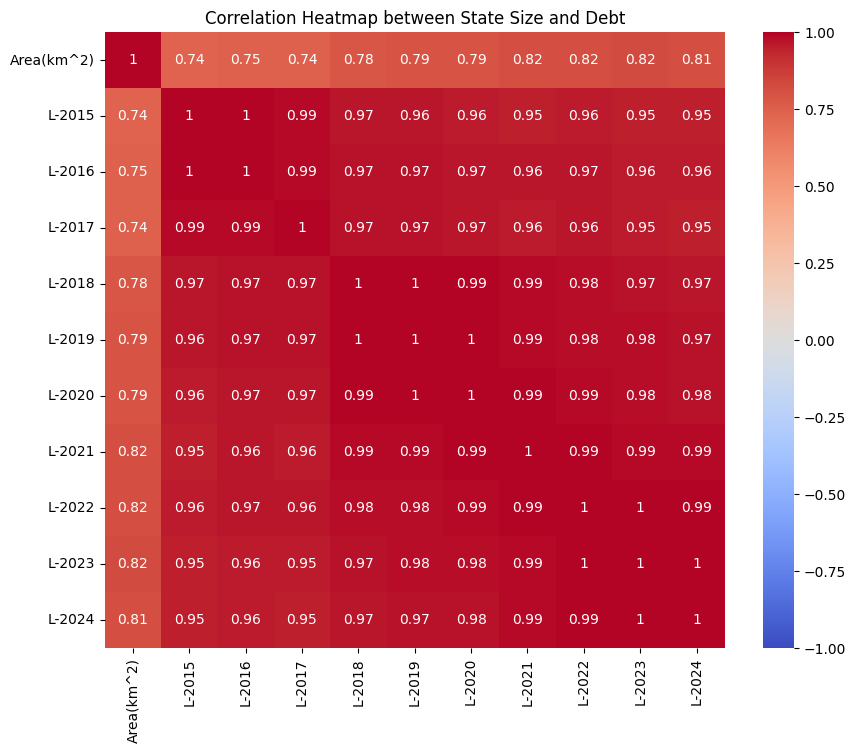

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for size and debt-related columns
correlation_matrix = work[['Area(km^2)', 'L-2015', 'L-2016', 'L-2017', 'L-2018', 'L-2019', 
                           'L-2020', 'L-2021', 'L-2022', 'L-2023', 'L-2024']].corr(method="spearman")

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap between State Size and Debt")
plt.show()


The corelation seems to be growing from 2015 to 2024, from which we can say that states with larger area seems to be accumulating more debt.

In [23]:
#bringing in new field population density
#we have noticed that there are many states with large area but, the state is covered with forests or arent inhabited
#therefore, we will be using population density

In [24]:
#adding population density to the dataset

p_density=['308','17','397','1102','189','394','308','573','123','414','319','859','236','365','122','132','52','119','269','550','201','86','555','312','350','828','189','1030','56','11297','2598']
p_density=pd.DataFrame(p_density,columns=['p_density'])
work = pd.concat([work, p_density], axis=1)
#do not want to repeat this, so commenting

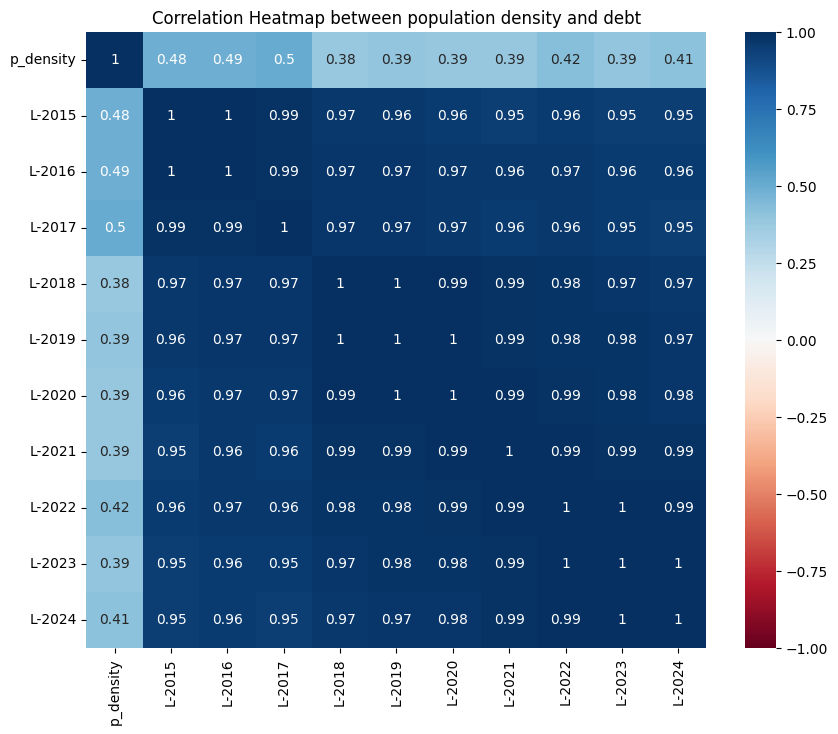

In [25]:
#correlation heatmap for density and debt
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for size and debt-related columns
correlation_matrix = work[['p_density', 'L-2015', 'L-2016', 'L-2017', 'L-2018', 'L-2019', 
                           'L-2020', 'L-2021', 'L-2022', 'L-2023', 'L-2024']].corr(method="spearman")

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title("Correlation Heatmap between population density and debt")
plt.show()

#not added into markdown

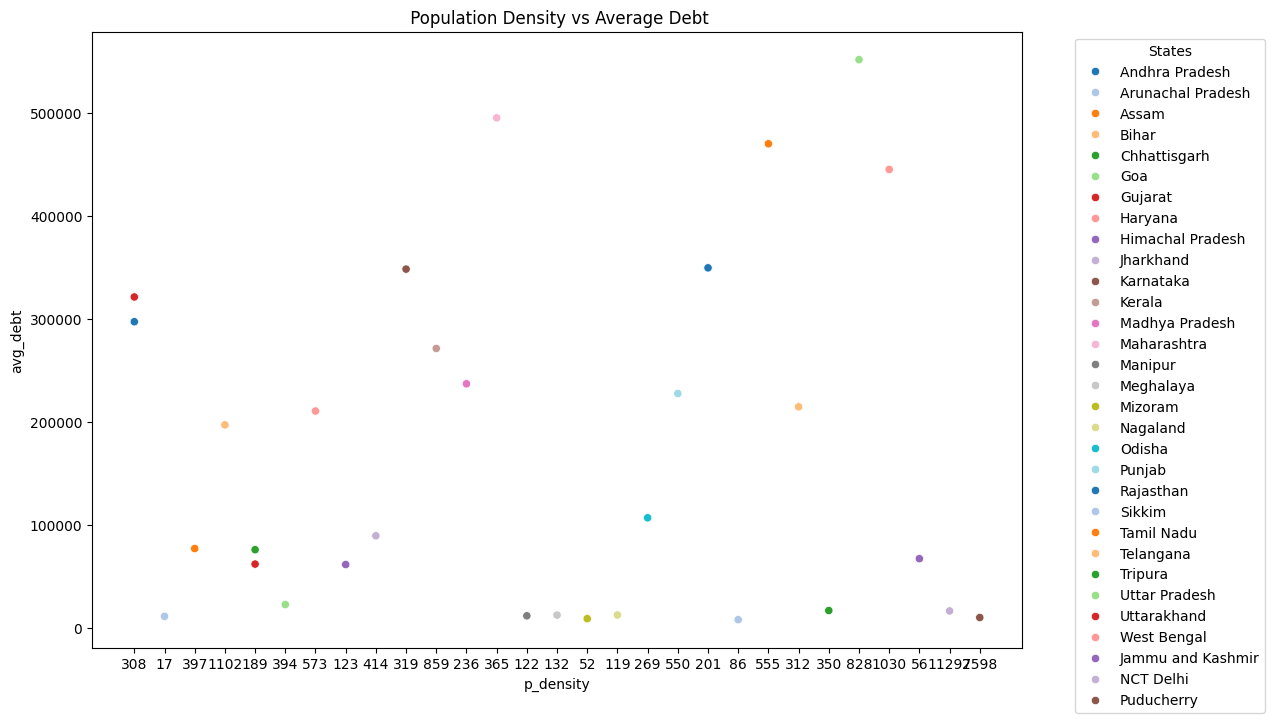

In [26]:
#plotting scatterplot population density vs average debt
work['avg_debt'] = work[['L-2015', 'L-2016', 'L-2017', 'L-2018', 'L-2019', 
                         'L-2020', 'L-2021', 'L-2022', 'L-2023', 'L-2024']].mean(axis=1)

plt.figure(figsize=(12, 8)) #made figsize beigger to make the x axis i.e p_density more visible
sns.scatterplot(data=work, x='p_density', y='avg_debt', hue='STATES' ,palette='tab20')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='States') #moving legend outside the plot
plt.title(" Population Density vs Average Debt")
plt.show()


The X axis shows the population density state wise and y axis shows the average debt

Correlation between population density and the average debt

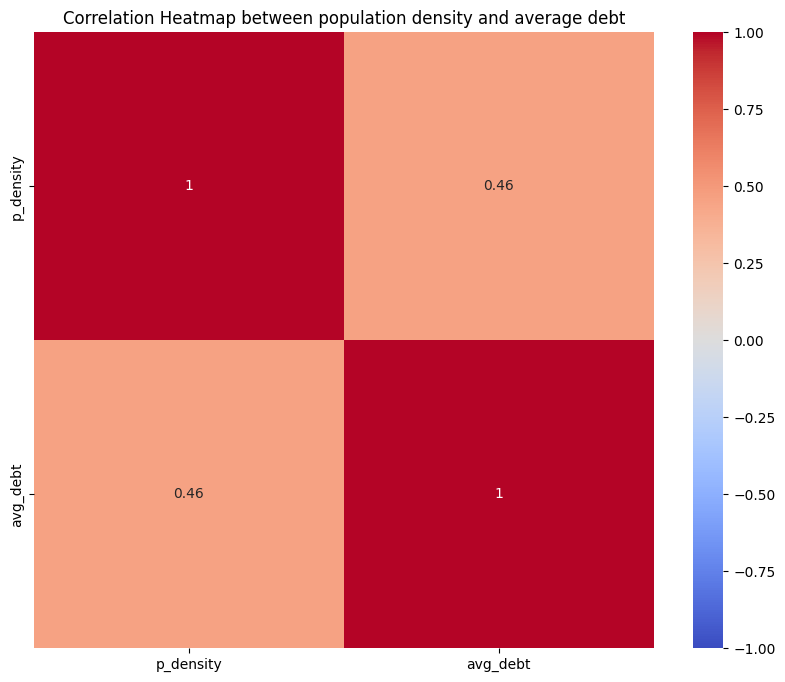

In [27]:
#correlation heatmap density and average debt

# Calculate the correlation matrix for size and debt-related columns
correlation_matrix = work[['p_density', 'avg_debt']].corr(method="spearman")

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap between population density and average debt")
plt.show()

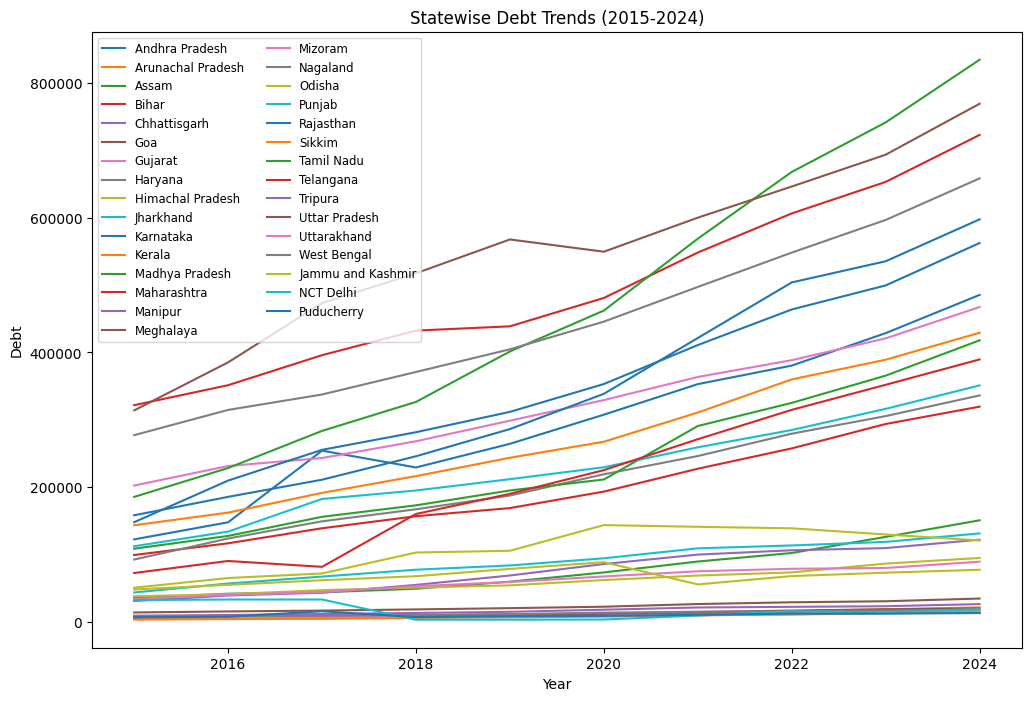

In [28]:
#line plot of state wise dent trends

plt.figure(figsize=(12, 8))
for state in work['STATES'].unique():
    subset = work[work['STATES'] == state]
    plt.plot(range(2015, 2025), subset[['L-2015', 'L-2016', 'L-2017', 'L-2018', 
                                       'L-2019', 'L-2020', 'L-2021', 'L-2022', 
                                       'L-2023', 'L-2024']].mean(), label=state)
plt.title("Statewise Debt Trends (2015-2024)")
plt.xlabel("Year")
plt.ylabel("Debt")
plt.legend(loc='best', ncol=2, fontsize='small')
plt.show()


In [29]:
# Literacy rates provided in the 2011 census
lit_rate = [
    67.02, 65.38, 72.19, 61.8, 70.28, 88.7, 78.03, 75.55, 82.8, 66.41,
    75.36, 94, 69.32, 82.34, 79.21, 74.43, 91.33, 79.55, 72.87, 75.84,
    66.11, 81.42, 80.09, 66.54, 87.22, 67.68, 79.63, 76.26, 67.16, 86.21, 85.85
]

work["lit_rate_%"] = lit_rate





In [30]:
# confirming literacy rates are added
work.loc[:, ["STATES", "lit_rate_%"]].head()

,STATES,lit_rate_%
0,Andhra Pradesh,67.02
1,Arunachal Pradesh,65.38
2,Assam,72.19
3,Bihar,61.80
4,Chhattisgarh,70.28


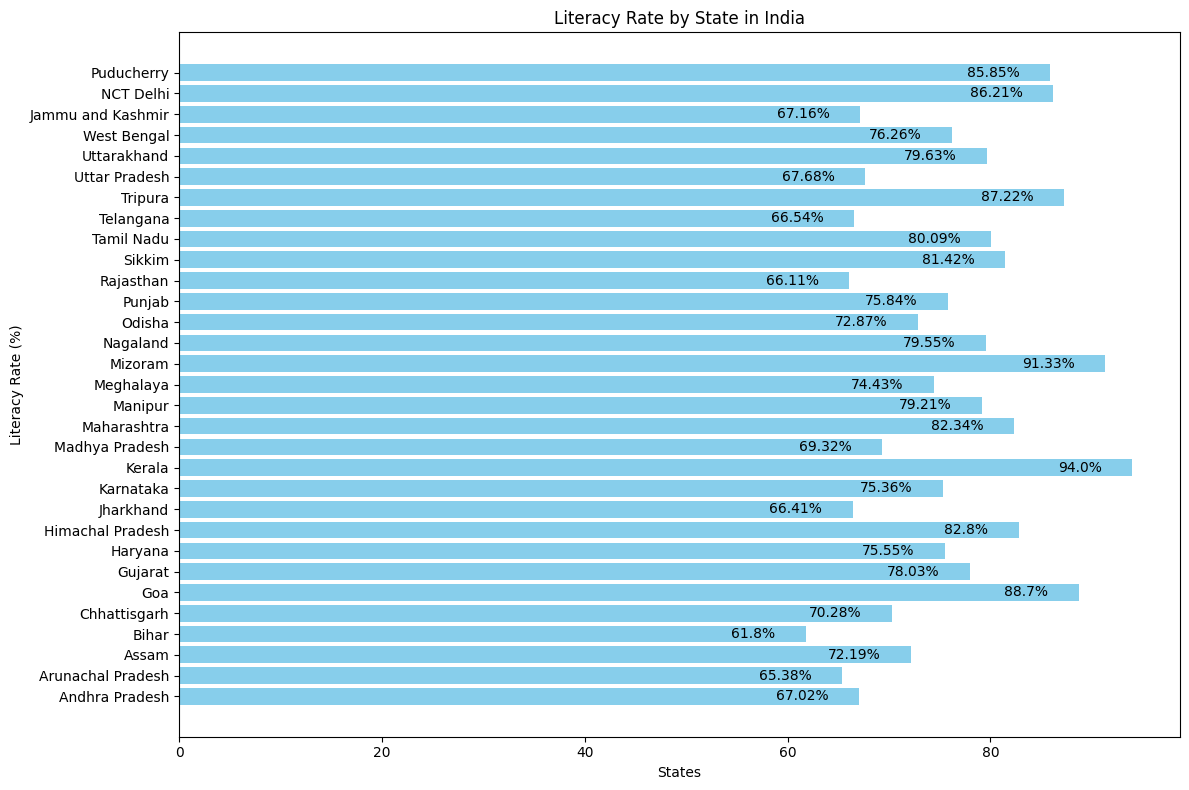

In [31]:
# plotting literacy rates
import matplotlib.pyplot as plt

# barh for horizontal bar chart for plotting the points
plt.figure(figsize=(12,8))
bars = plt.barh(work['STATES'], work['lit_rate_%'], color='skyblue')

# Adding percentage labels inside the bars
for bar in bars:
    plt.text(bar.get_width() - 3, bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width()}%', va='center', ha='right', color='black')

plt.xlabel('States')
plt.ylabel('Literacy Rate (%)')
plt.title('Literacy Rate by State in India')
plt.tight_layout()

# Display the chart
plt.show()


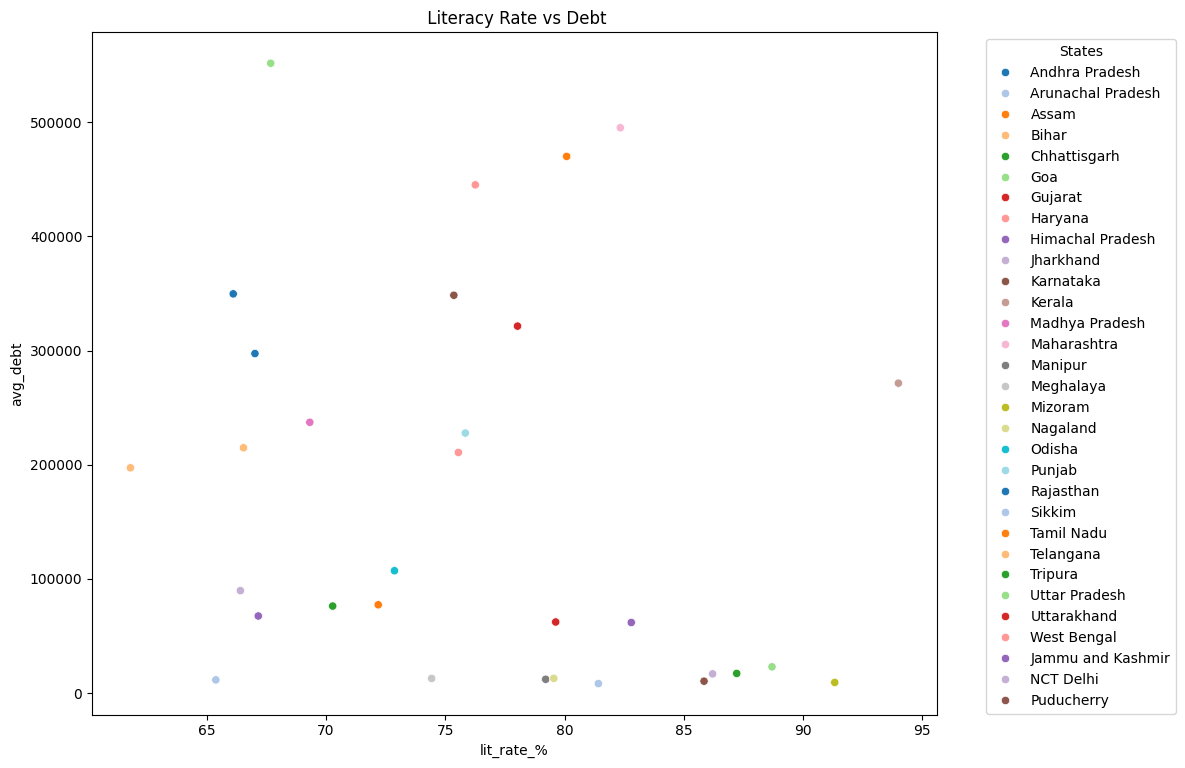

In [32]:
# plotting a scatterplot for litercy rate and debt
plt.figure(figsize=(12, 8)) #made figsize beigger to make the x axis 
sns.scatterplot(data=work, x='lit_rate_%', y='avg_debt', hue='STATES' ,palette='tab20')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='States') #moving legend outside the plot
plt.title(" Literacy Rate vs Debt")
plt.tight_layout() 
plt.show()


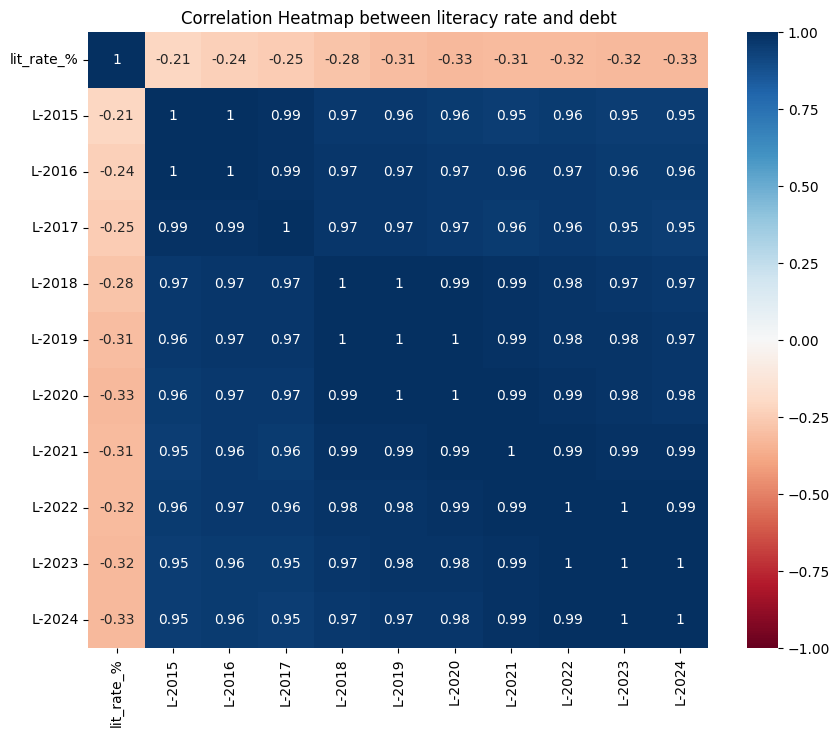

In [33]:
# correlation matrix for literacy rate and debt
correlation_matrix = work[['lit_rate_%', 'L-2015', 'L-2016', 'L-2017', 'L-2018', 'L-2019', 
                           'L-2020', 'L-2021', 'L-2022', 'L-2023', 'L-2024']].corr(method="spearman")

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title("Correlation Heatmap between literacy rate and debt")
plt.show()

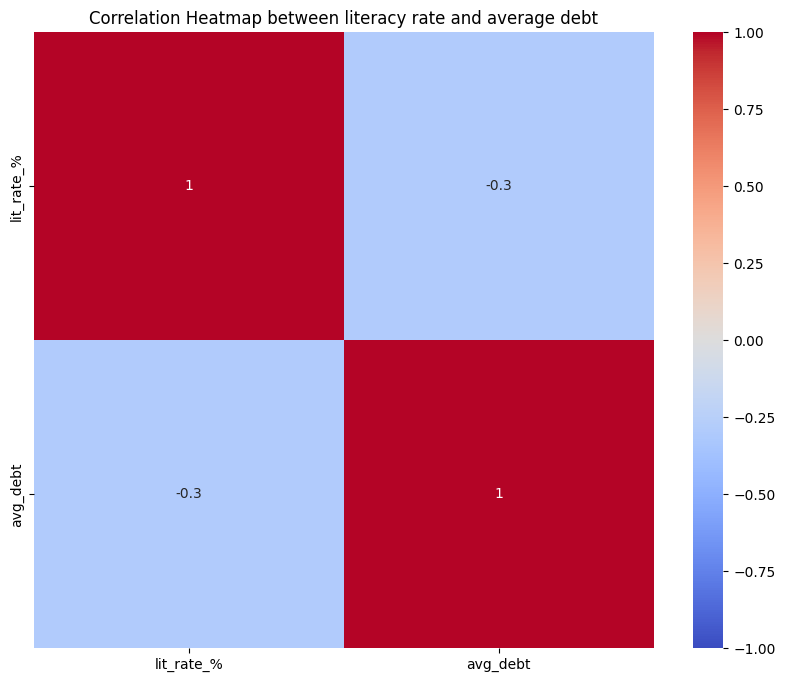

In [34]:
#  correlation matrix for size and debt-related columns
correlation_matrix = work[['lit_rate_%', 'avg_debt']].corr(method="spearman")

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap between literacy rate and average debt")
plt.show()